In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection

/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection


In [4]:
pwd

'/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection'

In [5]:
# !pip install -U --pre tensorflow=="2.*"
!pip install tf_slim

In [6]:
!pip install pycocotools

In [7]:
import os
import pathlib


if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3994, done.
remote: Counting objects: 100% (3994/3994), done.
remote: Compressing objects: 100% (3108/3108), done.
remote: Total 3994 (delta 1150), reused 1969 (delta 829), pack-reused 0
Receiving objects: 100% (3994/3994), 51.50 MiB | 14.23 MiB/s, done.
Resolving deltas: 100% (1150/1150), done.
Updating files: 100% (3608/3608), done.


In [8]:
pwd

'/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection'

In [9]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.

In [10]:
pwd

'/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection'

In [11]:
%cd models/research
!cp object_detection/packages/tf2/setup.py .
!pip install .

/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research
Processing /content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━

In [21]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [22]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [3]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

## Downloading Pretrained model

In [ ]:
pwd

'/content'

In [4]:
%cd /content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research


/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research


In [5]:
pwd

'/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research'

### Note:

1. Upload your data , labelmap.pbtxt & generate_tfrecord files into research folder

In [7]:
pwd

'/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research'

In [6]:
# !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2023-10-14 11:25:15--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.12.207, 172.217.194.207, 172.253.118.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.12.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M  21.6MB/s    in 12s     

2023-10-14 11:25:28 (19.6 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [8]:
# !tar -xvf faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
!tar -xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [9]:
#Renamimg the big name
# !mv faster_rcnn_resnet50_v1_640x640_coco17_tpu-8 faster_rcnn_50
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8 ssd_50

### Note:
1. Now create a folder inside research named "training"

2. Move labelmap.pbtxt into training folder

3. Copy pipeline.config into training folder

### Genrating tfrecords file from CSV format

In [10]:
!python generate_tfrecord.py --csv_input=chess_dataset/train/train.csv --image_dir=chess_dataset/train --output_path=train.record

2023-10-14 11:33:43.499236: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-14 11:33:43.499290: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-14 11:33:43.499341: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-14 11:33:45.148423: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Successfully created the TFRecords: /content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research/train.record


In [11]:
!python generate_tfrecord.py --csv_input=chess_dataset/valid/test.csv --image_dir=chess_dataset/valid --output_path=test.record

2023-10-14 11:37:48.455900: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-14 11:37:48.455963: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-14 11:37:48.456013: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-14 11:37:50.167263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Successfully created the TFRecords: /content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research/test.record


### Lets Start Training

### Note: ( change config file & move model_main_tf2.py to research)
1. line no 3 ( num_classes: 6)
2. line no 161 ("ssd_50/checkpoint/ckpt-0")
3. line no 162 (num_steps: 20)
4. line no 167 (fine_tune_checkpoint_type: "detection")
5. line no 172 (label_map_path: "training/labelmap.pbtxt")
6. line no 182 (label_map_path: "training/labelmap.pbtxt")
7. line no 174 ( input_path: "train.record")
8. line no 186 ( input_path: "test.record")
9. line no 131 (batch_size: 8)



In [12]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [13]:
!pip install tensorflow==2.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 42.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [1]:
%pwd

'/content'

In [2]:
%cd /content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research


/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research


In [3]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [4]:
!python model_main_tf2.py --model_dir=training --pipeline_config_path=training/pipeline.config

2023-10-14 11:50:15.905929: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-14 11:50:23.928625: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1014 11:50:23.930020 137996695605888 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I1014 11:50:23.958775 137996695605888 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1014 11:50:23.958982 137996695605888 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1014 11:50:23.985367 137996695605888 dep

In [5]:
!pwd

/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research


## Exporting checkpoint files to Saved Model Format

### Note:
1. Move exporter_main_v2.py file from object detection to research

In [ ]:
pwd

'/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research'

In [6]:
### Exporting the Infernece Graph
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path training/pipeline.config --trained_checkpoint_dir training/ --output_directory exported-models/my_model

2023-10-14 11:58:08.521475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-14 11:58:13.265096: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1014 11:58:13.740890 137458156843648 deprecation.py:641] From /usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py:459: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back

## Inferencing

In [7]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [8]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

#Model preparation

In [9]:
# Custom Model Loading

def load_custom_model(model_name):
  model_file = model_name
  model_dir = pathlib.Path(model_file)/"saved_model"
  model = tf.saved_model.load(str(model_dir))
  return model

## Loading label map

In [10]:

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'training/labelmap.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [11]:
import pathlib
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('test_images')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('test_images/e4583d082076b2b549b3736ad1b193c9_jpg.rf.e642d1a3b35643917627f34a2ebbfe06.jpg'),
 PosixPath('test_images/f1a24b6bb778ee11ba33687415aa84f2_jpg.rf.5c58c6da7fcad8735bb00a604169dc24.jpg'),
 PosixPath('test_images/fdcd6ada676799da8a870f58fdf548db_jpg.rf.c9a75c60766995abcff8565e384f3e18.jpg')]

###  Load an object detection model

In [12]:
model_name = '/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp/TFOD2-Detection/models/research/exported-models/my_model'
detection_model = load_custom_model(model_name)

In [ ]:
# print(detection_model.signatures['serving_default'].inputs)
# print(detection_model.signatures['serving_default'].output_dtypes)
# print(detection_model.signatures['serving_default'].output_shapes)

[<tf.Tensor 'input_tensor:0' shape=(1, None, None, 3) dtype=uint8>, <tf.Tensor 'unknown:0' shape=() dtype=resource>, <tf.Tensor 'unknown_0:0' shape=() dtype=resource>, <tf.Tensor 'unknown_1:0' shape=() dtype=resource>, <tf.Tensor 'unknown_2:0' shape=() dtype=resource>, <tf.Tensor 'unknown_3:0' shape=() dtype=resource>, <tf.Tensor 'unknown_4:0' shape=() dtype=resource>, <tf.Tensor 'unknown_5:0' shape=() dtype=resource>, <tf.Tensor 'unknown_6:0' shape=() dtype=resource>, <tf.Tensor 'unknown_7:0' shape=() dtype=resource>, <tf.Tensor 'unknown_8:0' shape=() dtype=resource>, <tf.Tensor 'unknown_9:0' shape=() dtype=resource>, <tf.Tensor 'unknown_10:0' shape=() dtype=resource>, <tf.Tensor 'unknown_11:0' shape=() dtype=resource>, <tf.Tensor 'unknown_12:0' shape=() dtype=resource>, <tf.Tensor 'unknown_13:0' shape=() dtype=resource>, <tf.Tensor 'unknown_14:0' shape=() dtype=resource>, <tf.Tensor 'unknown_15:0' shape=() dtype=resource>, <tf.Tensor 'unknown_16:0' shape=() dtype=resource>, <tf.Tenso

In [17]:
import numpy as np

In [18]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy()
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

  return output_dict

In [19]:
def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

  display(Image.fromarray(image_np))

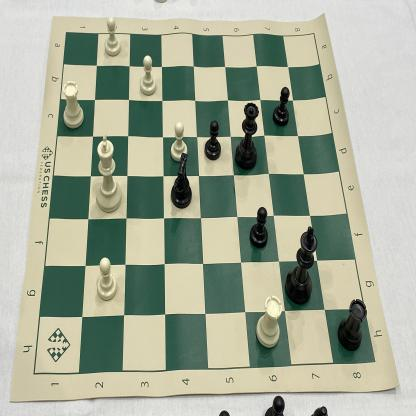

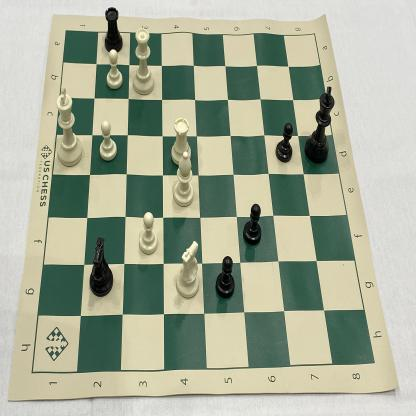

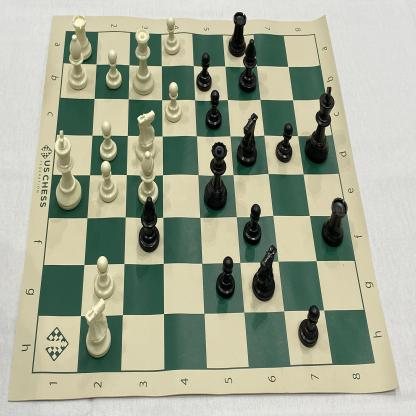

In [23]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(detection_model, image_path)